In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('Crop_recommendation.csv')
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
dataset.tail(30)

,N,P,K,temperature,humidity,ph,rainfall,label
2170,114,20,26,25.556567,62.670878,7.279057,193.586623,coffee
2171,117,26,30,27.923744,67.969109,7.079851,115.232553,coffee
2172,111,29,31,26.059684,52.310985,6.136287,161.343254,coffee
2173,119,30,28,26.357709,64.575780,6.505204,163.626950,coffee
2174,116,40,33,24.913705,54.153192,7.042089,129.548114,coffee
2175,95,37,35,27.313171,68.423339,6.348338,192.428814,coffee
2176,86,40,33,26.138787,52.263117,7.432322,136.302777,coffee
2177,117,37,32,23.106938,67.062305,6.787659,162.576961,coffee
2178,105,18,35,23.526481,68.440307,6.743417,171.883994,coffee
2179,109,23,25,25.117110,68.480304,7.007332,194.877348,coffee


In [4]:
dataset.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
dataset['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
dataset['label'] = label_encoder.fit_transform(dataset['label']) 
dataset['label_encoded'] = dataset['label']
dataset['label_encoded']

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label_encoded, Length: 2200, dtype: int32

In [7]:
dataset['label_encoded'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [8]:
dataset = dataset.drop(columns=['label'])
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


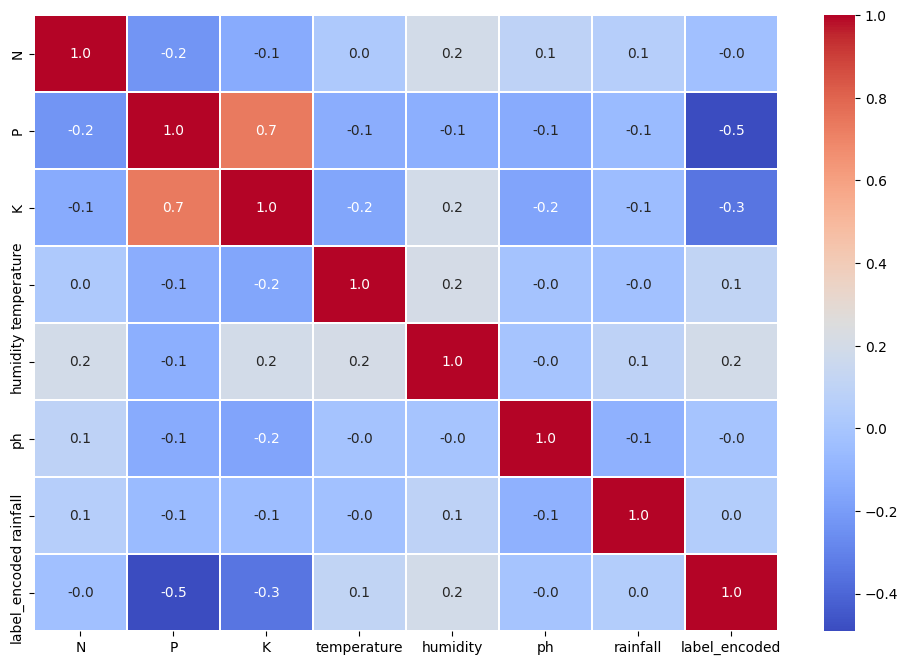

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [10]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = dataset[features]
y = dataset['label_encoded']

X = X.values
y = y.values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier

dtree_score = []
for i in range(2,100):
    dtree_classifier = DecisionTreeClassifier(max_leaf_nodes=i)
    dtree_classifier.fit(X_train, y_train)
    dtree_score.append(dtree_classifier.score(X_test, y_test))
    
dtree_accuracy = max(dtree_score)
print(f"Decision Tree Accuracy: {dtree_accuracy*100}%")

Decision Tree Accuracy: 98.63636363636363%


In [13]:
dtreeclf = DecisionTreeClassifier() # initializing
dtreeclf.fit(X_train, y_train) # fitting data for training

y_predict = dtreeclf.predict(X_test) # prediction on dataset

print("Classification Report: \n", classification_report(y_test, y_predict))

dtreeclf_acc_score= accuracy_score(y_test, y_predict) # Accuracy score
print("Accuracy score: " + str(round(dtreeclf_acc_score * 100, 2))+ '%')

dtreeclf_mae = mean_absolute_error(y_test, y_predict)
print('The Mean Absolute Error:', dtreeclf_mae)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17
           2       0.92      1.00      0.96        22
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19
           5       1.00      0.94      0.97        18
           6       0.95      1.00      0.98        21
           7       1.00      1.00      1.00        22
           8       0.90      0.90      0.90        20
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        27
          11       1.00      0.95      0.97        20
          12       1.00      1.00      1.00        28
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        19
  

In [14]:
dtreeclf.fit(X_train, y_train)

# Make predictions on the training and testing sets
train_predictions = dtreeclf.predict(X_train)
test_predictions = dtreeclf.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Classification Report: \n", classification_report(y_test, test_predictions))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17
           2       0.92      1.00      0.96        22
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        19
           5       1.00      0.94      0.97        18
           6       0.95      1.00      0.98        21
           7       1.00      1.00      1.00        22
           8       0.89      0.85      0.87        20
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        27
          11       1.00      0.95      0.97        20
          12       1.00      1.00      1.00        28
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        19
  

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

train_pred = log_reg.predict(X_train)
test_pred = log_reg.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Classification Report: \n", classification_report(y_test, test_pred))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        17
           2       0.95      0.95      0.95        22
           3       1.00      1.00      1.00        22
           4       1.00      0.95      0.97        19
           5       0.90      1.00      0.95        18
           6       0.87      0.95      0.91        21
           7       1.00      1.00      1.00        22
           8       0.80      0.80      0.80        20
           9       1.00      1.00      1.00        17
          10       0.93      1.00      0.96        27
          11       0.94      0.80      0.86        20
          12       1.00      1.00      1.00        28
          13       0.94      0.85      0.89        20
          14       0.95      0.95      0.95        19
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        19
  

c:\Users\Excelsior_13\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knnlist = []
trainknnlist = []
testknnlist = []

for k in range(1,50):
    knn_classifier = KNeighborsClassifier(n_neighbors=20) # Initialize KNN classifier
    knn_classifier.fit(X_train, y_train) # Train KNN classifier

    train_pred = knn_classifier.predict(X_train) # Predict on the training set
    test_pred = knn_classifier.predict(X_test) # Predict on the test set

    train_accuracy = accuracy_score(y_train, train_pred)
    trainknnlist.append(train_accuracy)
    test_accuracy = accuracy_score(y_test, test_pred)
    testknnlist.append(test_accuracy)

knn_train_accuracy = max(trainknnlist)
knn_test_accuracy = max(testknnlist)

print(f"KNN Classifier Training Accuracy: {round(knn_train_accuracy*100, 2)}%")
print(f"KNN Classifier Testing Accuracy: {round(knn_test_accuracy*100, 2)}%")


KNN Classifier Training Accuracy: 97.39%
KNN Classifier Testing Accuracy: 97.05%


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

train_pred = rf_clf.predict(X_train)
test_pred = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

# Accuracy score
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9954545454545455


In [18]:
import joblib
joblib.dump(rf_clf, 'crop_recommend_model.pkl')

['crop_recommend_model.pkl']

In [19]:
rf_model = joblib.load('crop_recommend_model.pkl')

In [20]:
# # features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# # ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
# #        'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
# #        'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
# #        'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


# # array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
# #        17,  4,  6,  8,  5])


# # Function to get user input and make a prediction
# def get_user_input_and_predict():
#     try:
#         nitrogen = float(input("Enter nitrogen level: "))
#         phosphorus = float(input("Enter phosphorus level: "))
#         potassium = float(input("Enter potassium level: "))
#         temperature = float(input("Enter temperature (°C): "))
#         humidity = float(input("Enter humidity level: "))
#         ph = float(input("Enter pH level: "))
#         rainfall = float(input("Enter rainfall level: "))
        
#     except ValueError:
#         print("Please enter valid numeric values.")
#         return

#     # Create a DataFrame for the input
#     input_data = pd.DataFrame([[nitrogen, phosphorus, potassium, temperature, humidity, ph, rainfall]],
#                               columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

#     # Make a prediction
#     prediction = rf_model.predict(input_data)

#     crop_mapping = {
#         20: 'rice', 11: 'maize', 3:'chickpea', 9:'kidneybeans', 18:'pigeonpeas',
#        13:'mothbeans', 14:'mungbean', 2:'blackgram', 10:'lentil', 19:'pomegranate',
#        1:'banana', 12:'mango', 7:'grapes', 21:'watermelon', 15:'muskmelon', 0:'apple',
#        16:'orange', 17:'papaya', 4:'coconut', 6:'cotton', 8:'jute', 5:'coffee'
#     }

#     recommended_crop = crop_mapping.get(prediction[0], "Unknown")

#     print(f"Recommended crop: {recommended_crop}")

# # Run the function
# if __name__ == "__main__":
#     get_user_input_and_predict()